In [1]:
#imports

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as dt
import requests
import json
from collections import defaultdict, OrderedDict
from scipy.optimize import curve_fit
from pandas.tseries.holiday import *
from pandas.tseries.offsets import CustomBusinessDay


In [2]:
#write a function to see files:

def file_eval(file):
    print('Head of file: \n\n {}'.format(file.head()),'\n\n\n')
    print('Shape of file: \n\n {}'.format(file.shape),'\n\n\n')
    print(file.info(),'\n\n\n')
    print('Missing values: \n\n {}'.format(file.isna().sum()),'\n\n\n')
    print('Data type:\n\n {}'.format(file.dtypes),'\n\n\n')
    print('Columns:\n\n {}'.format(file.columns))

In [3]:
ILI= pd.read_csv('ILINet.csv')
file_eval(ILI)

Head of file: 

   REGION TYPE                REGION  YEAR  WEEK % WEIGHTED ILI  \
0      States            California  2010    40              X   
1      States  District of Columbia  2010    40              X   
2      States               Florida  2010    40              X   
3      States              New York  2010    40              X   
4      States                 Texas  2010    40              X   

  %UNWEIGHTED ILI AGE 0-4 AGE 25-49 AGE 25-64 AGE 5-24 AGE 50-64 AGE 65  \
0         1.95412       X         X         X        X         X      X   
1         2.80877       X         X         X        X         X      X   
2               X       X         X         X        X         X      X   
3         0.26299       X         X         X        X         X      X   
4         2.06514       X         X         X        X         X      X   

  ILITOTAL NUM. OF PROVIDERS TOTAL PATIENTS  
0      632               112          32342  
1       73                 4           2599

In [4]:
ILI= ILI.drop(columns = ['REGION TYPE', '% WEIGHTED ILI','NUM. OF PROVIDERS','AGE 0-4', 'AGE 25-64', 'AGE 5-24', 'AGE 65', 'AGE 25-49', 'AGE 50-64'])
ILI.replace('X', np.NaN, inplace=True)
ILI.replace('T0', 'TX', inplace=True)

In [5]:
ILI.isnull().sum()

REGION               0
YEAR                 0
WEEK                 0
%UNWEIGHTED ILI    544
ILITOTAL           544
TOTAL PATIENTS     544
dtype: int64

In [6]:
ILI['%UNWEIGHTED ILI'] = ILI['%UNWEIGHTED ILI'].astype('float64')
ILI['ILITOTAL'] = ILI['ILITOTAL'].astype('float64')
ILI['TOTAL PATIENTS'] = ILI['TOTAL PATIENTS'].astype('float64')

In [7]:
ILI = ILI.interpolate(limit_direction="both", limit_area="inside")

In [8]:
ILI.isnull().sum()

REGION             0
YEAR               0
WEEK               0
%UNWEIGHTED ILI    0
ILITOTAL           0
TOTAL PATIENTS     0
dtype: int64

In [9]:
ILI =ILI.set_index('REGION')
ILI['WEEK']=ILI['WEEK'].astype(str).str.rjust(2, "0") ## adding a leading zero to week numbers that are one digit
ILI["DATE"] = ILI["YEAR"].astype(str) + ILI["WEEK"].astype(str)

In [10]:
print('ILI YEAR counts:\n\n', ILI['YEAR'].value_counts(), '\n\n', ILI.groupby(['YEAR', 'REGION', 'WEEK']).size(), '\n\n', ILI.groupby(['REGION', 'DATE']).size())

ILI YEAR counts:

 2020    318
2014    318
2019    312
2017    312
2015    312
2013    312
2011    312
2018    312
2016    312
2012    312
2010     78
2021     54
Name: YEAR, dtype: int64 

 YEAR  REGION      WEEK
2010  California  40      1
                  41      1
                  42      1
                  43      1
                  44      1
                         ..
2021  Texas       05      1
                  06      1
                  07      1
                  08      1
                  09      1
Length: 3264, dtype: int64 

 REGION      DATE  
California  201040    1
            201041    1
            201042    1
            201043    1
            201044    1
                     ..
Texas       202105    1
            202106    1
            202107    1
            202108    1
            202109    1
Length: 3264, dtype: int64


In [11]:
file_eval(ILI)

Head of file: 

                       YEAR WEEK  %UNWEIGHTED ILI  ILITOTAL  TOTAL PATIENTS  \
REGION                                                                       
California            2010   40          1.95412     632.0         32342.0   
District of Columbia  2010   40          2.80877      73.0          2599.0   
Florida               2010   40          1.53588      55.0          8334.0   
New York              2010   40          0.26299      37.0         14069.0   
Texas                 2010   40          2.06514    1050.0         50844.0   

                        DATE  
REGION                        
California            201040  
District of Columbia  201040  
Florida               201040  
New York              201040  
Texas                 201040   



Shape of file: 

 (3264, 6) 



<class 'pandas.core.frame.DataFrame'>
Index: 3264 entries, California to New York City
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------       

In [12]:
WHO = pd.read_csv('WHO_NREVSS.csv')
file_eval(WHO)

Head of file: 

                  REGION  YEAR  WEEK TOTAL SPECIMENS PERCENT POSITIVE
0            California  2010    40             183             3.28
1  District of Columbia  2010    40              14                0
2               Florida  2010    40               X                X
3              New York  2010    40             300                1
4                 Texas  2010    40             301             0.66 



Shape of file: 

 (3264, 5) 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3264 entries, 0 to 3263
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   REGION            3264 non-null   object
 1   YEAR              3264 non-null   int64 
 2   WEEK              3264 non-null   int64 
 3   TOTAL SPECIMENS   3264 non-null   object
 4   PERCENT POSITIVE  3264 non-null   object
dtypes: int64(2), object(3)
memory usage: 127.6+ KB
None 



Missing values: 

 REGION              0
YEA

In [13]:
WHO.replace('X', np.NaN, inplace=True)
ILI.replace('T0', 'TX', inplace=True)

In [14]:
WHO.isnull().sum()

REGION                 0
YEAR                   0
WEEK                   0
TOTAL SPECIMENS     1584
PERCENT POSITIVE    1584
dtype: int64

In [15]:
WHO['TOTAL SPECIMENS'] = WHO['TOTAL SPECIMENS'].astype('float64')
WHO['PERCENT POSITIVE'] = WHO['PERCENT POSITIVE'].astype('float64')

In [16]:
WHO = WHO.interpolate(limit_direction="both", limit_area="inside")
WHO = WHO.ffill()

In [17]:
WHO= WHO.set_index('REGION')
WHO['WEEK']=WHO['WEEK'].astype(str).str.rjust(2, "0") ## adding a leading zero to week numbers that are one digit
WHO["DATE"] = WHO["YEAR"].astype(str) + WHO["WEEK"].astype(str)


In [18]:
file_eval(WHO)

Head of file: 

                       YEAR WEEK  TOTAL SPECIMENS  PERCENT POSITIVE    DATE
REGION                                                                    
California            2010   40            183.0              3.28  201040
District of Columbia  2010   40             14.0              0.00  201040
Florida               2010   40            157.0              0.50  201040
New York              2010   40            300.0              1.00  201040
Texas                 2010   40            301.0              0.66  201040 



Shape of file: 

 (3264, 5) 



<class 'pandas.core.frame.DataFrame'>
Index: 3264 entries, California to New York City
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              3264 non-null   int64  
 1   WEEK              3264 non-null   object 
 2   TOTAL SPECIMENS   3264 non-null   float64
 3   PERCENT POSITIVE  3264 non-null   float64
 4   DATE            

In [19]:
weather = pd.read_csv('weather.csv', low_memory=False)
file_eval(weather)

Head of file: 

   STATION      DATE PRCP TAVG
0      CA  9/1/2012  NaN   71
1      CA  9/2/2012  NaN   80
2      CA  9/3/2012  NaN   82
3      CA  9/4/2012  NaN   84
4      CA  9/5/2012  NaN   82 



Shape of file: 

 (3823640, 4) 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3823640 entries, 0 to 3823639
Data columns (total 4 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   STATION  object
 1   DATE     object
 2   PRCP     object
 3   TAVG     object
dtypes: object(4)
memory usage: 116.7+ MB
None 



Missing values: 

 STATION          0
DATE             0
PRCP        390800
TAVG       3412608
dtype: int64 



Data type:

 STATION    object
DATE       object
PRCP       object
TAVG       object
dtype: object 



Columns:

 Index(['STATION', 'DATE', 'PRCP', 'TAVG'], dtype='object')


In [20]:
weather.set_index('STATION')
#weather['PRCP'] = weather['PRCP'].fillna(0)
weather.loc[(weather.STATION=='CA') , ['STATION','DATE','PRCP', 'TAVG']]

,STATION,DATE,PRCP,TAVG
0,CA,9/1/2012,NaN,71
1,CA,9/2/2012,NaN,80
2,CA,9/3/2012,NaN,82
3,CA,9/4/2012,NaN,84
4,CA,9/5/2012,NaN,82
...,...,...,...,...
1048570,CA,5/14/2015,NaN,44
1048571,CA,5/15/2015,NaN,44
1048572,CA,5/16/2015,NaN,50
1048573,CA,5/17/2015,NaN,48


In [21]:
weather.loc[(weather.STATION=='CA') &(~weather.TAVG.isnull()) , ['STATION','DATE','PRCP', 'TAVG']]

,STATION,DATE,PRCP,TAVG
0,CA,9/1/2012,NaN,71
1,CA,9/2/2012,NaN,80
2,CA,9/3/2012,NaN,82
3,CA,9/4/2012,NaN,84
4,CA,9/5/2012,NaN,82
...,...,...,...,...
1048570,CA,5/14/2015,NaN,44
1048571,CA,5/15/2015,NaN,44
1048572,CA,5/16/2015,NaN,50
1048573,CA,5/17/2015,NaN,48


In [22]:
weather['DATE']=weather['DATE'].str.strip()
weather['TAVG']=weather['TAVG'].str.strip()
weather['DATE']=weather.DATE.str.replace('/', '-')

In [23]:
weather['DATE'] = pd.to_datetime(weather['DATE'],errors='coerce')
weather['YEAR']= weather['DATE'].dt.year.astype('Int64')
weather['WEEK'] = weather['DATE'].dt.week.astype('Int64')
weather['WEEK']=weather['WEEK'].astype(str).str.rjust(2, "0") ## adding a leading zero to week numbers that are one digit
weather["epidate"] = weather["YEAR"].astype(str) + weather["WEEK"].astype(str)
weather=weather.drop(columns = ['YEAR','WEEK','DATE'])
weather['DATE'] = weather['epidate']
weather  = weather.drop(columns=['epidate'])

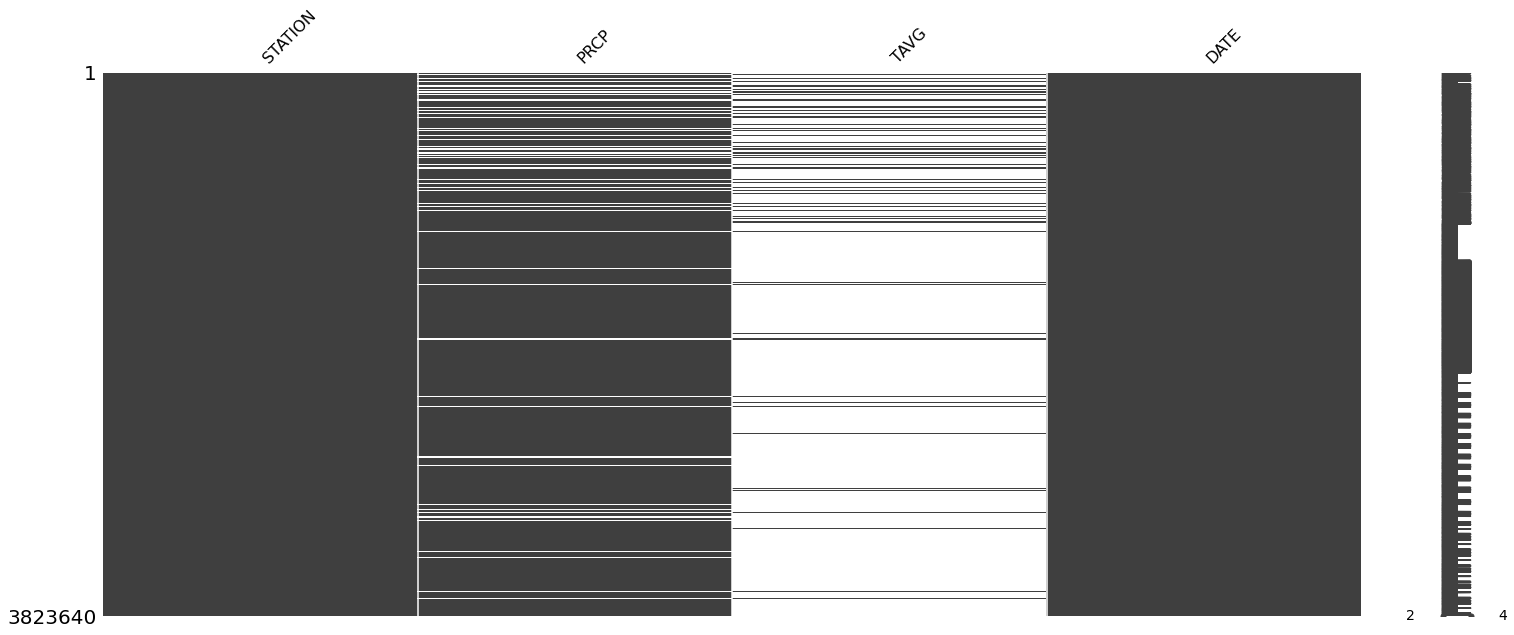

In [24]:
msno.matrix(weather)
plt.show()

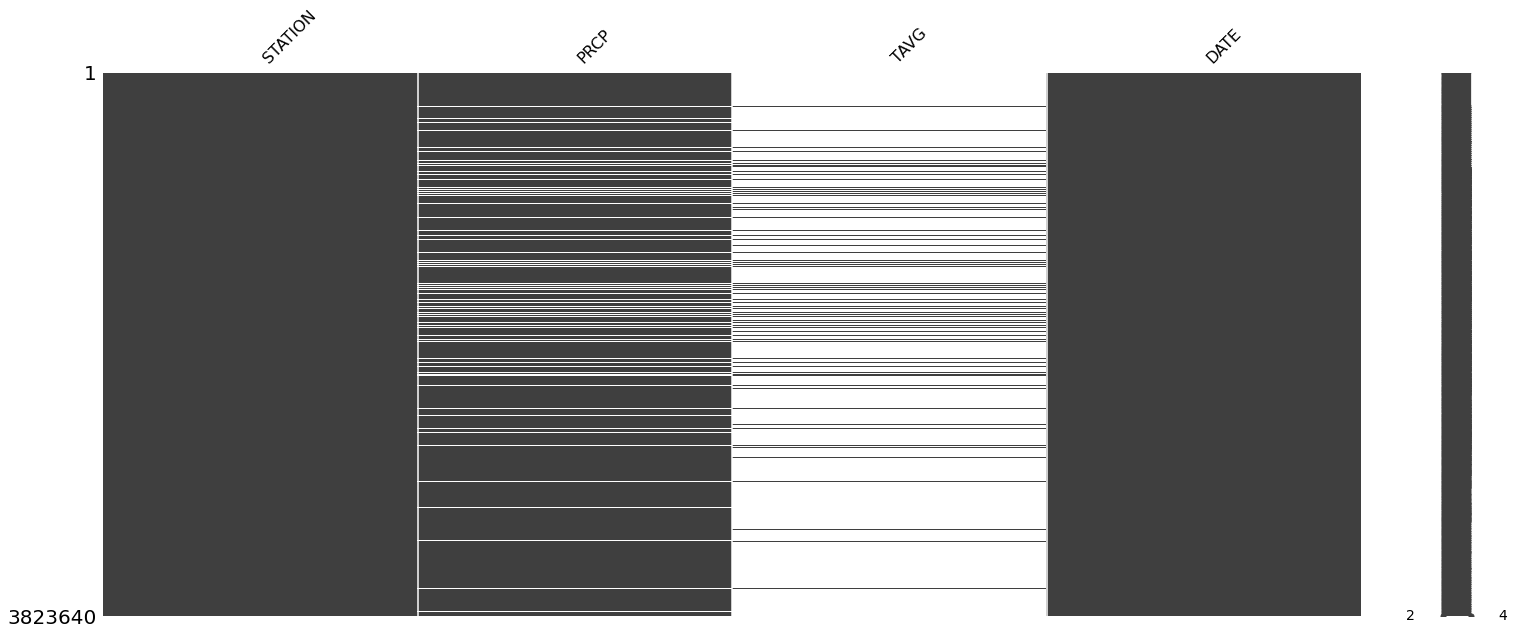

In [25]:
weather_sorted = weather.sort_values(by=['DATE', 'STATION'])
msno.matrix(weather_sorted)
plt.show()

In [26]:
pd.to_numeric(weather['DATE'], errors='coerce').astype('Int64')
weather.loc[weather['DATE'] == '<NA><NA>'] = np.nan

In [27]:
weather.isna().sum()

STATION         40
PRCP        390840
TAVG       3412648
DATE            40
dtype: int64

In [28]:
weather['TAVG'] = weather['TAVG'].astype(np.float)
weather['PRCP'] = weather['PRCP'].astype(np.float)
#weather= weather.interpolate(limit=1) ##performs linear interpolation at missing data points.

In [29]:
weather_CA = weather.loc[weather.STATION=='CA']
weather_NY = weather.loc[weather.STATION=='NY']
weather_FL = weather.loc[weather.STATION=='FL']
weather_TX = weather.loc[weather.STATION=='TX']
weather_DC = weather.loc[weather.STATION=='DC']

In [30]:
##performs linear interpolation at missing data points.
weather_CA= weather_CA.interpolate(limit_direction="both", limit_area="inside")
weather_NY= weather_NY.interpolate(limit_direction="both", limit_area="inside")
weather_FL= weather_FL.interpolate(limit_direction="both", limit_area="inside")
weather_TX= weather_TX.interpolate(limit_direction="both", limit_area="inside")
weather_DC= weather_DC.interpolate(limit_direction="both", limit_area="inside")
weather= pd.concat([weather_CA,weather_NY, weather_FL, weather_TX, weather_DC])

In [31]:
weather = weather.interpolate()

In [32]:
weather.isna().sum()

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


STATION      0
PRCP       122
TAVG         0
DATE         0
dtype: int64

In [33]:
columns = ['STATION', 'DATE', 'PRCP']
summaries = {'TAVG' : 'mean'}
weather_meanT= weather.groupby(columns).agg(summaries).reset_index()


columns = ['STATION', 'DATE', 'TAVG']
summaries = {'PRCP' : 'mean'}
weather_meanP= weather.groupby(columns).agg(summaries).reset_index()
weather= weather.fillna(weather_meanP)

#weather = weather.fillna(method="pad", limit=1)
#weather = weather.fillna(method="pad", limit=1)
#weather = weather.fillna(method="bfill", limit=1)
#weather = weather.fillna(method="bfill", limit=1)

#weather = weather.dropna(subset=['STATION', 'PRCP', 'DATE'])



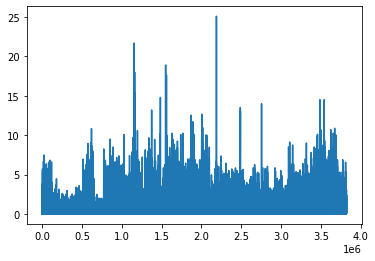

In [34]:
weather['PRCP'].plot()  # plots Series directly
plt.show()

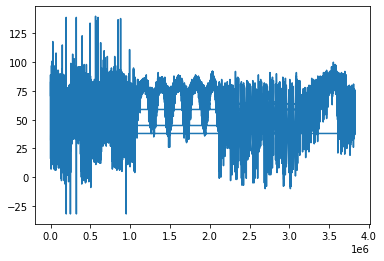

In [35]:
weather['TAVG'].plot()  # plots Series directly
plt.show()

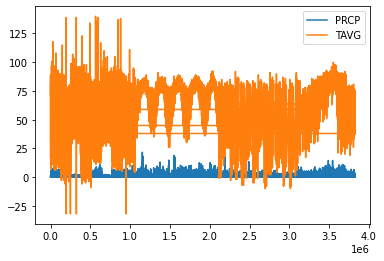

In [36]:
weather.plot()  # plots all Series at once
plt.show()

In [37]:
columns = ['STATION', 'DATE', 'PRCP']
summaries = {'TAVG' : 'median'}
weather_medianT= weather.groupby(columns).agg(summaries).reset_index()

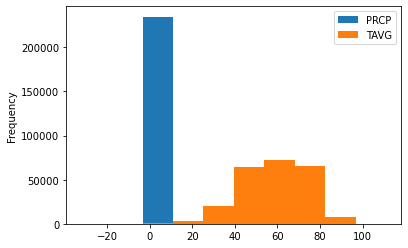

In [38]:
weather_meanT.plot.hist()

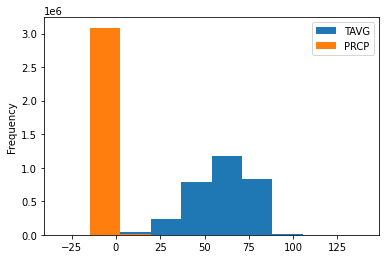

In [39]:
weather_meanP.plot.hist()

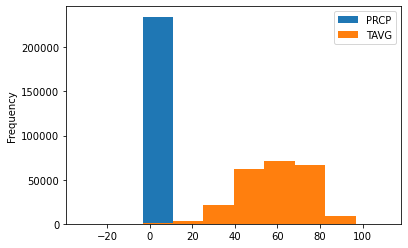

In [40]:
weather_medianT.plot.hist()

In [41]:
duplicates = weather.duplicated(subset=['STATION', 'DATE', 'PRCP', 'TAVG'], keep = False)
weather[duplicates].sort_values(by='DATE')

,STATION,PRCP,TAVG,DATE
1049831,DC,0.0,38.0,201001
1049887,DC,0.0,26.0,201001
1049832,DC,0.0,38.0,201001
1049830,DC,0.0,38.0,201001
1056685,DC,0.0,26.0,201001
...,...,...,...,...
3805060,TX,0.0,38.0,202053
3805061,TX,0.0,38.0,202053
3746238,TX,0.0,56.0,202053
3735890,TX,0.0,67.0,202053


In [42]:
weather.drop_duplicates(subset=['STATION', 'DATE', 'PRCP','TAVG'], inplace = True)
weather.sort_values(by='DATE')

,STATION,PRCP,TAVG,DATE
1049888,DC,0.00,31.0,201001
1056687,DC,0.00,29.0,201001
1056686,DC,0.00,28.0,201001
1056684,DC,0.00,24.0,201001
1049829,DC,0.25,38.0,201001
...,...,...,...,...
1056875,DC,1.71,72.0,202842
1048589,DC,0.30,38.0,202842
1050092,DC,0.16,71.0,203042
1048591,DC,0.67,38.0,203042


In [43]:
#weather = weather.groupby(['STATION', 'DATE', 'PRCP'])['TAVG'].agg({'TAVG': 'mean'}['TAVG']).reset_index()
#weather = weather.groupby(['STATION', 'DATE', 'TAVG'])['PRCP'].agg({'PRCP': 'mean'}['PRCP']).reset_index()

In [44]:
weather = weather.groupby(['STATION', 'DATE']).agg(TAVG=('TAVG', 'mean'), PRCP=('PRCP', 'mean')).reset_index()

In [45]:
weatherDict ={}
weatherDict['California'] = 'CA'
weatherDict['District of Columbia'] = 'DC'
weatherDict['Florida'] = 'FL'
weatherDict['New York'] = 'NY'
weatherDict['Texas'] = 'TX'

In [46]:
weather['REGION'] = weather['STATION'] 
weather.groupby(['STATION', 'DATE'])['REGION'].count()

STATION  DATE  
CA       201201    1
         201235    1
         201236    1
         201237    1
         201238    1
                  ..
TX       202049    1
         202050    1
         202051    1
         202052    1
         202053    1
Name: REGION, Length: 1421, dtype: int64

In [47]:
file_eval(weather)

Head of file: 

   STATION    DATE       TAVG      PRCP REGION
0      CA  201201  48.751158  0.043387     CA
1      CA  201235  48.363644  0.039215     CA
2      CA  201236  48.772527  0.040706     CA
3      CA  201237  49.297293  0.043038     CA
4      CA  201238  49.500751  0.038778     CA 



Shape of file: 

 (1421, 5) 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1421 non-null   object 
 1   DATE     1421 non-null   object 
 2   TAVG     1421 non-null   float64
 3   PRCP     1421 non-null   float64
 4   REGION   1421 non-null   object 
dtypes: float64(2), object(3)
memory usage: 55.6+ KB
None 



Missing values: 

 STATION    0
DATE       0
TAVG       0
PRCP       0
REGION     0
dtype: int64 



Data type:

 STATION     object
DATE        object
TAVG       float64
PRCP       float64
REGION      object
dtype: object 



Columns:



In [48]:
VAX = pd.read_csv('dataView2301_3.csv')
file_eval(VAX)

Head of file: 

   Age group       State  Season  numvaccinated
0       0-4  California    2011         1298.0
1       0-4  California    2012          499.0
2       0-4  California    2013          672.0
3       0-4  California    2014          858.0
4       0-4  California    2015          909.0 



Shape of file: 

 (150, 4) 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age group      150 non-null    object 
 1   State          150 non-null    object 
 2   Season         150 non-null    int64  
 3   numvaccinated  150 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.8+ KB
None 



Missing values: 

 Age group        0
State            0
Season           0
numvaccinated    0
dtype: int64 



Data type:

 Age group         object
State             object
Season             int64
numvaccinated    float64
dt

In [49]:
VAX['Age group'].value_counts()

≥65     50
0-4     50
5_64    50
Name: Age group, dtype: int64

In [50]:
print(VAX['State'].value_counts())


Texas                   30
Florida                 30
District of Columbia    30
California              30
New York                30
Name: State, dtype: int64


In [51]:
VAX.head()

,Age group,State,Season,numvaccinated
0,0-4,California,2011,1298.0
1,0-4,California,2012,499.0
2,0-4,California,2013,672.0
3,0-4,California,2014,858.0
4,0-4,California,2015,909.0


In [52]:
VAX.groupby(['State', 'Season', 'Age group']).describe()

numvaccinated                                 \
                                    count     mean std      min      25%   
State      Season Age group                                                
California 2011   0-4                 1.0   1298.0 NaN   1298.0   1298.0   
                  5_64                1.0  12051.0 NaN  12051.0  12051.0   
                  ≥65                 1.0   4390.0 NaN   4390.0   4390.0   
           2012   0-4                 1.0    499.0 NaN    499.0    499.0   
                  5_64                1.0   7325.0 NaN   7325.0   7325.0   
...                                   ...      ...  ..      ...      ...   
Texas      2019   5_64                1.0  13114.0 NaN  13114.0  13114.0   
                  ≥65                 1.0   2476.0 NaN   2476.0   2476.0   
           2020   0-4                 1.0   2902.0 NaN   2902.0   2902.0   
                  5_64                1.0  11785.0 NaN  11785.0  11785.0   
                  ≥65                 1.0   2150.0 NaN   2150.0   2150.0   

                                                        
                                 50%      75%      max  
State      Season Age group                             
California 2011   0-4         1298.0   1298.0   1298.0  
                  5_64       12051.0  12051.0  12051.0  
                  ≥65         4390.0   4390.0   4390.0  
           2012   0-4          499.0    499.0    499.0  
                  5_64        7325.0   7325.0   7325.0  
...                              ...      ...      ...  
Texas      2019   5_64       13114.0  13114.0  13114.0  
                  ≥65         2476.0   2476.0   2476.0  
           2020   0-4         2902.0   2902.0   2902.0  
                  5_64       11785.0  11785.0  11785.0  
                  ≥65         2150.0   2150.0   2150.0  

[150 rows x 8 columns]

[Text(0, 0.5, 'numvaccinated'),
 Text(0.5, 0, 'rows'),
 Text(0.5, 1.0, 'Flu vaccine')]

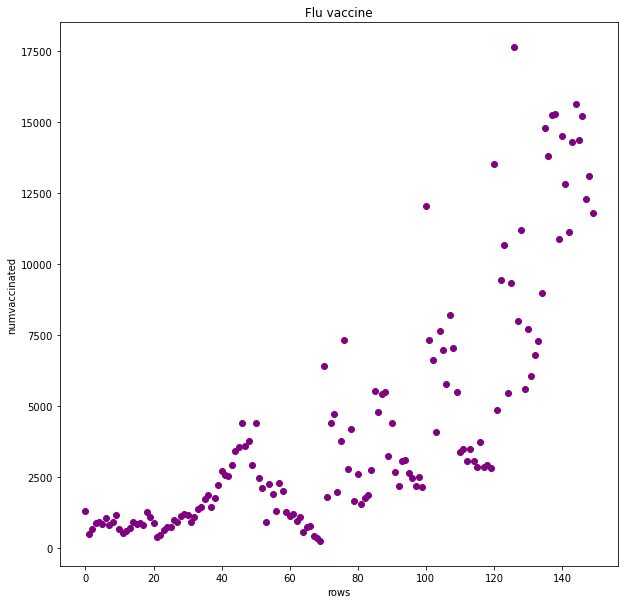

In [53]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))
# Add x-axis and y-axis
ax.scatter(VAX.index.values,
           VAX['numvaccinated'],
           color='purple')
ax.set(xlabel="rows",
       ylabel="numvaccinated",
       title="Flu vaccine")

In [54]:
VAX['T'] = pd.to_datetime(VAX['Season'].astype(str), format='%Y')
VAX = VAX.drop(columns = ['Season'])
#VAX['YEAR']= VAX['T'].dt.year.astype('Int64')
#VAX['WEEK']= VAX['T'].dt.week.astype('Int64')
#VAX['WEEK']=VAX['WEEK'].astype(str).str.rjust(2, "0") ## adding a leading zero to week numbers that are one digi
#VAX["DATE"] = VAX["YEAR"].astype(str) + VAX["WEEK"].astype(str)

In [55]:
WeekDates = []
for i in range(2011,2021):
    j = str(i) + '-01-01'
    name = "VAX_"+ str(i)
    name = pd.date_range(j, periods=52, freq='W')
    WeekDates.append(name)


In [56]:
VAX = VAX.groupby(['State', 'T']).agg(numvaccinated=('numvaccinated', 'sum')).reset_index()

In [57]:
CAL = VAX['State'] == 'California'
FLO = VAX['State'] == 'Florida'
NYO = VAX['State'] == 'New York'
TEX = VAX['State'] == 'Texas'
WDC = VAX['State'] == 'District of Columbia'

In [58]:
VAXCAL = []
VAXFLO = []
VAXNYO = []
VAXTEX = []
VAXWDC = []

for i in range(2011,2021):
    
    y = "V" + str(i)
    VYear = VAX['T'] == str(i) + '-01-01'
    
    VACA ='VACA' + str(i)[2:] 
    VACA = VAX[CAL][VYear]
    VAXCAL.append(VACA)
    
    VAFL ='VAFL' + str(i)[2:] 
    VAFL = VAX[FLO][VYear]
    VAXFLO.append(VAFL)
    
    VANY ='VANY' + str(i)[2:] 
    VANY = VAX[NYO][VYear]
    VAXNYO.append(VANY)
    
    VATX ='VATX' + str(i)[2:] 
    VATX = VAX[TEX][VYear]
    VAXTEX.append(VATX)
    
    VADC ='VADC' + str(i)[2:] 
    VADC = VAX[WDC][VYear]
    VAXWDC.append(VADC)


<ipython-input-58-d100030625b2>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  VACA = VAX[CAL][VYear]
<ipython-input-58-d100030625b2>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  VAFL = VAX[FLO][VYear]
<ipython-input-58-d100030625b2>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  VANY = VAX[NYO][VYear]
<ipython-input-58-d100030625b2>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  VATX = VAX[TEX][VYear]
<ipython-input-58-d100030625b2>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  VADC = VAX[WDC][VYear]


In [59]:

j = 0
CAL_list = []
NYO_list = []
TEX_list = []
FLO_list = []
WDC_list = []

for i in range(2011,2021):
    a = 'CA'+ str(i)[2:] 
    a = pd.concat([VAXCAL[j]]*52)
    a['T'] = WeekDates[j]
    CAL_list.append(a)
    
    b = 'NY'+ str(i)[2:] 
    b = pd.concat([VAXNYO[j]]*52)
    b['T'] = WeekDates[j]
    NYO_list.append(b)
    
    c = 'TX'+ str(i)[2:] 
    c = pd.concat([VAXTEX[j]]*52)
    c['T'] = WeekDates[j]
    TEX_list.append(c)
    
    
    d = 'FL'+ str(i)[2:] 
    d = pd.concat([VAXFLO[j]]*52)
    d['T'] = WeekDates[j]
    FLO_list.append(d)
    
    e = 'DC'+ str(i)[2:] 
    e = pd.concat([VAXWDC[j]]*52)
    e['T'] = WeekDates[j]
    WDC_list.append(e)
    
    j+=1



In [60]:
# j = 0
# CA_list = []
# NY_list = []
# TX_list = []
# FL_list = []
# DC_list = []

# for i in range(2011,2021):
#     a = CAL_list[j]
#     a.numvaccinated[1:].replace(a.numvaccinated, np.NaN, inplace=True)
#     CA_list.append(a)
    
#     b = NYO_list[j]
#     b.numvaccinated[1:].replace(b.numvaccinated, np.NaN, inplace=True)
#     NY_list.append(b)
    
#     c = FLO_list[j]
#     c.numvaccinated[1:].replace(c.numvaccinated, np.NaN, inplace=True)
#     FL_list.append(c)
    
#     d = TEX_list[j]
#     d.numvaccinated[1:].replace(d.numvaccinated, np.NaN, inplace=True)
#     TX_list.append(d)
    
#     e = WDC_list[j]
#     e.numvaccinated[1:].replace(e.numvaccinated, np.NaN, inplace=True)
#     DC_list.append(e)
    
#     j+=1

    
# CA_df = pd.concat(CA_list, axis=0, ignore_index=True)
# NY_df = pd.concat(NY_list, axis = 0, ignore_index=True)
# FL_df = pd.concat(FL_list, axis = 0, ignore_index=True)
# TX_df = pd.concat(TX_list, axis = 0, ignore_index=True)
# DC_df = pd.concat(DC_list, axis = 0, ignore_index=True)

# df2_list = [CA_df, NY_df, TX_df, FL_df, DC_df]
# VAX = pd.concat(df2_list)

In [61]:
j = 0

for i in range(2011,2021):
    
    NYO_list[j]['numvaccinated'] = (NYO_list[j].numvaccinated[0:1])/52
    CAL_list[j]['numvaccinated'] = (CAL_list[j].numvaccinated[0:1])/52
    FLO_list[j]['numvaccinated'] = (FLO_list[j].numvaccinated[0:1])/52
    TEX_list[j]['numvaccinated'] = (TEX_list[j].numvaccinated[0:1])/52
    WDC_list[j]['numvaccinated'] = (WDC_list[j].numvaccinated[0:1])/52
    j+=1


CAL_df = pd.concat(CAL_list, axis=0, ignore_index=True)
NYO_df = pd.concat(NYO_list, axis = 0, ignore_index=True)
FLO_df = pd.concat(FLO_list, axis = 0, ignore_index=True)
TEX_df = pd.concat(TEX_list, axis = 0, ignore_index=True)
WDC_df = pd.concat(WDC_list, axis = 0, ignore_index=True)

df_list = [CAL_df, NYO_df, TEX_df, FLO_df, WDC_df]
VAX = pd.concat(df_list)

In [62]:
#week_data_cur = 100
#def custom_resampler(week_data):
#    global week_data_cur
#    if len(week_data.values) > 0:
#        week_data_cur = week_data.values[0]

#    return week_data_cur/52
  
#VACS = VAX.set_index('T').groupby(['State', 'Age group']).resample('1W')['#vaccinated'].apply(custom_resampler)
#VACS = VAX.set_index('T').groupby(['State']).resample('1W')['numvaccinated'].apply(custom_resampler).reset_index()

In [63]:
VAX['REGION']= VAX['State']
VAX['YEAR']= VAX['T'].dt.year.astype('Int64')
VAX['WEEK'] = VAX['T'].dt.week.astype('Int64')
VAX['WEEK']=VAX['WEEK'].astype(str).str.rjust(2, "0") ## adding a leading zero to week numbers that are one digit
VAX['DATE']= VAX["YEAR"].astype(str) + VAX["WEEK"].astype(str)
VAX['numvaccinated']= VAX['numvaccinated'].astype(float)
VAX['DATE'] = VAX['DATE'].astype(str)
VAX['REGION'] = VAX['REGION'].replace(weatherDict)
VAX= VAX.drop(columns = 'State')

In [64]:
duplicates = VAX.duplicated(subset=['REGION', 'DATE'], keep = False)
VAX[duplicates].sort_values(by='DATE')

,T,numvaccinated,REGION,YEAR,WEEK,DATE


In [65]:
VAX.drop_duplicates(subset =['REGION', 'DATE'], inplace = True)

In [66]:
class FluHolidayCalendar(AbstractHolidayCalendar):
   rules = [
     Holiday('New Year', month=1, day=1, observance=sunday_to_monday),
     Holiday('Groundhog Day', month=1, day=6, observance=sunday_to_monday),
     Holiday('St. Patricks Day', month=3, day=17, observance=sunday_to_monday),
     Holiday('April Fools Day', month=4, day=1),
     Holiday('Good Friday', month=1, day=1, offset=[Easter(), Day(-2)]),
     Holiday('July 4th', month=7, day=4, observance=nearest_workday),
     Holiday('All Saints Day', month=11, day=1, observance=sunday_to_monday),
     Holiday('Christmas', month=12, day=25, observance=nearest_workday),
     USMartinLutherKingJr,
     USPresidentsDay,
     USMemorialDay,
     USLaborDay,
     USColumbusDay,
     Holiday("Veterans Day", month=11, day=11, observance=nearest_workday),
     USThanksgivingDay
    
   ]

FLU_HD = CustomBusinessDay(calendar=FluHolidayCalendar())

calendar = FluHolidayCalendar()
holidays = calendar.holidays()

VAX['Holiday'] = VAX['T'].isin(holidays)

In [67]:
file_eval(VAX)

Head of file: 

            T  numvaccinated REGION  YEAR WEEK    DATE  Holiday
0 2011-01-02     341.134615     CA  2011   52  201152    False
1 2011-01-09     341.134615     CA  2011   01  201101    False
2 2011-01-16     341.134615     CA  2011   02  201102    False
3 2011-01-23     341.134615     CA  2011   03  201103    False
4 2011-01-30     341.134615     CA  2011   04  201104    False 



Shape of file: 

 (2600, 7) 



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2600 entries, 0 to 519
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   T              2600 non-null   datetime64[ns]
 1   numvaccinated  2600 non-null   float64       
 2   REGION         2600 non-null   object        
 3   YEAR           2600 non-null   Int64         
 4   WEEK           2600 non-null   object        
 5   DATE           2600 non-null   object        
 6   Holiday        2600 non-null   bool          
dtype

In [68]:
fludeaths = pd.read_csv('Deaths_from_Pneumonia_and_Influenza_(P&I)_and_all_deaths_by_state_and_region.csv', low_memory=False)
file_eval(fludeaths)

Head of file: 

    geoid  Region         State  age   season  MMWR Year/Week  \
0  State     NaN      Maryland  All  2017-18          201831   
1  State     NaN         Texas  All  2017-18          201819   
2  State     NaN  Pennsylvania  All  2017-18          201802   
3  State     NaN      Colorado  All  2017-18          201818   
4  State     NaN      Maryland  All  2017-18          201807   

   Deaths from influenza  Deaths from pneumonia  \
0                    NaN                    NaN   
1                    NaN                    NaN   
2                    NaN                    NaN   
3                    NaN                    NaN   
4                    NaN                    NaN   

   Deaths from pneumonia and influenza  All Deaths  \
0                                 64.0       949.0   
1                                242.0      3664.0   
2                                282.0      3185.0   
3                                 41.0       702.0   
4                    

In [69]:
fludeaths =fludeaths.set_index('State')
#Use flu deaths data's `select_dtypes` method to select columns of dtype 'object'
fludeaths.select_dtypes(object)

,geoid,age,season
State,,,
Maryland,State,All,2017-18
Texas,State,All,2017-18
Pennsylvania,State,All,2017-18
Colorado,State,All,2017-18
Maryland,State,All,2017-18
...,...,...,...
New York,State,All,2011-12
Kentucky,State,All,2016-17
South Carolina,State,All,2014-15


In [70]:
fludeaths.groupby(['season', 'State']).size()

season   State        
2009-10  Alabama          52
         Alaska           52
         Arizona          52
         Arkansas         52
         California       52
                          ..
2018-19  Virginia         25
         Washington       25
         West Virginia    25
         Wisconsin        25
         Wyoming          25
Length: 520, dtype: int64

In [71]:
fludeaths = fludeaths.loc[['California', 'Texas', 'District of Columbia', 'New York', 'Florida', 'New York City']]

In [72]:
fludeaths = fludeaths.drop(columns=['Region', 'season', 'geoid'])

In [73]:
fludeaths.reset_index(inplace=True)
fludeaths['DATE'] = fludeaths['MMWR Year/Week']
fludeaths['REGION'] = fludeaths['State']
fludeaths['REGION'] = fludeaths['REGION'].replace(weatherDict)
fludeaths = fludeaths.drop(columns=['State', 'MMWR Year/Week'])
fludeaths = fludeaths.dropna(subset=['Deaths from pneumonia and influenza', 'All Deaths', 'Pecent of deaths due to pneumonia or influenza'])
fludeaths = fludeaths.drop(columns=['Deaths from influenza', 'Deaths from pneumonia'])
fludeaths['DATE']= fludeaths['DATE'].astype('str')

In [74]:
file_eval(fludeaths)

Head of file: 

    age  Deaths from pneumonia and influenza  All Deaths  \
0  All                                546.0      5656.0   
1  All                                351.0      4966.0   
2  All                                569.0      5893.0   
3  All                                298.0      4850.0   
4  All                                294.0      4703.0   

   Pecent of deaths due to pneumonia or influenza  pecent complete    DATE  \
0                                        9.653465       124.738726  201808   
1                                        7.068063       109.521307  201818   
2                                        9.655524       129.965579  201810   
3                                        6.144330       106.963016  201825   
4                                        6.251329       103.721045  201831   

  REGION  
0     CA  
1     CA  
2     CA  
3     CA  
4     CA   



Shape of file: 

 (2960, 7) 



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2960 en

In [113]:
gmobility = pd.read_csv('google_mobility.csv', low_memory=False)
file_eval(gmobility)

Head of file: 

         State       date  retail_and_recreation_percent_change_from_baseline  \
0  California  2/15/2020                                                1.0    
1  California  2/16/2020                                                5.0    
2  California  2/17/2020                                                9.0    
3  California  2/18/2020                                                0.0    
4  California  2/19/2020                                                0.0    

   grocery_and_pharmacy_percent_change_from_baseline  \
0                                                1.0   
1                                                0.0   
2                                                1.0   
3                                                0.0   
4                                                0.0   

   parks_percent_change_from_baseline  \
0                                19.0   
1                                31.0   
2                                44.0   
3

In [114]:
gmobility['retail_and_recreation_percent_change_from_baseline'] = gmobility['retail_and_recreation_percent_change_from_baseline'].fillna(0)
gmobility['grocery_and_pharmacy_percent_change_from_baseline'] = gmobility['grocery_and_pharmacy_percent_change_from_baseline'].fillna(0)
gmobility['parks_percent_change_from_baseline'] = gmobility['parks_percent_change_from_baseline'].fillna(0)
gmobility['transit_stations_percent_change_from_baseline'] = gmobility['transit_stations_percent_change_from_baseline'].fillna(0)
gmobility['workplaces_percent_change_from_baseline'] = gmobility['workplaces_percent_change_from_baseline'].fillna(0)
gmobility['residential_percent_change_from_baseline'] = gmobility['residential_percent_change_from_baseline'].fillna(0)


In [115]:
gmobility.set_index('State')
gmobility['date']=gmobility['date'].str.strip()
gmobility['date']=gmobility.date.str.replace('/', '-')

In [116]:
gmobility['date'] = pd.to_datetime(gmobility['date'],errors='coerce')
gmobility['YEAR']= gmobility['date'].dt.year.astype('str')
gmobility['WEEK'] = gmobility['date'].dt.week.astype('str').str.rjust(2, "0")
gmobility["DATE"] = gmobility["YEAR"] + gmobility["WEEK"]
gmobility=gmobility.drop(columns = ['YEAR','WEEK','date'])

In [117]:
duplicates = gmobility.duplicated(subset=['State', 'DATE'], keep = False)
gmobility[duplicates].sort_values(by='DATE')

,State,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,DATE
0,California,1.0,1.0,19.0,1.0,-1.0,0.0,202007
13950,New York,4.0,0.0,34.0,17.0,-1.0,0.0,202007
22783,Texas,-3.0,-6.0,0.0,0.0,-9.0,0.0,202007
22784,Texas,-4.0,-7.0,0.0,0.0,-12.0,0.0,202007
33940,Texas,12.0,1.0,19.0,-6.0,-1.0,-1.0,202007
...,...,...,...,...,...,...,...,...
28657,Texas,0.0,0.0,0.0,0.0,-25.0,0.0,202020
7073,Florida,0.0,0.0,0.0,-5.0,-17.0,0.0,202020
7072,Florida,0.0,0.0,0.0,-9.0,-19.0,0.0,202020
7161,Florida,0.0,0.0,0.0,0.0,-22.0,0.0,202020


In [118]:
gmobility['Total_retail_and_recreation_percent_change_from_baseline'] = gmobility.groupby(['State', 'DATE'])['retail_and_recreation_percent_change_from_baseline'].transform('sum')
gmobility['grocery_and_pharmacy_percent_change_from_baseline'] = gmobility.groupby(['State', 'DATE'])['grocery_and_pharmacy_percent_change_from_baseline'].transform('sum')
gmobility['parks_percent_change_from_baseline'] = gmobility.groupby(['State', 'DATE'])['parks_percent_change_from_baseline'].transform('sum')
gmobility['transit_stations_percent_change_from_baseline'] = gmobility.groupby(['State', 'DATE'])['transit_stations_percent_change_from_baseline'].transform('sum')
gmobility['workplaces_percent_change_from_baseline'] = gmobility.groupby(['State', 'DATE'])['workplaces_percent_change_from_baseline'].transform('sum')
gmobility['residential_percent_change_from_baseline'] = gmobility.groupby(['State', 'DATE'])['residential_percent_change_from_baseline'].transform('sum')


In [121]:
gmobility.drop_duplicates(subset=['State', 'DATE'],inplace=True

,State,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,DATE,Total_retail_and_recreation_percent_change_from_baseline
0,California,1.0,651.0,3973.0,471.0,-133.0,-83.0,202007,1143.0
2,California,9.0,839.0,8749.0,302.0,-2378.0,305.0,202008,2140.0
9,California,2.0,1451.0,6248.0,1263.0,927.0,-282.0,202009,2565.0
16,California,6.0,2486.0,5425.0,563.0,708.0,-138.0,202010,2605.0
23,California,3.0,4990.0,992.0,-2848.0,-1030.0,751.0,202011,-475.0


In [123]:
gmobility.DATE.unique()

array(['202007', '202008', '202009', '202010', '202011', '202012',
       '202013', '202014', '202015', '202016', '202017', '202018',
       '202019', '202020'], dtype=object)

In [122]:
file_eval(gmobility)

Head of file: 

          State  retail_and_recreation_percent_change_from_baseline  \
0   California                                                1.0    
2   California                                                9.0    
9   California                                                2.0    
16  California                                                6.0    
23  California                                                3.0    

    grocery_and_pharmacy_percent_change_from_baseline  \
0                                               651.0   
2                                               839.0   
9                                              1451.0   
16                                             2486.0   
23                                             4990.0   

    parks_percent_change_from_baseline  \
0                               3973.0   
2                               8749.0   
9                               6248.0   
16                              5425.0   
23       

In [83]:
ILI_WHO = ILI.merge(WHO, on =['DATE', 'REGION'])
file_eval(ILI_WHO)

Head of file: 

                       YEAR_x WEEK_x  %UNWEIGHTED ILI  ILITOTAL  \
REGION                                                           
California              2010     40          1.95412     632.0   
District of Columbia    2010     40          2.80877      73.0   
Florida                 2010     40          1.53588      55.0   
New York                2010     40          0.26299      37.0   
Texas                   2010     40          2.06514    1050.0   

                      TOTAL PATIENTS    DATE  YEAR_y WEEK_y  TOTAL SPECIMENS  \
REGION                                                                         
California                   32342.0  201040    2010     40            183.0   
District of Columbia          2599.0  201040    2010     40             14.0   
Florida                       8334.0  201040    2010     40            157.0   
New York                     14069.0  201040    2010     40            300.0   
Texas                        50844.0  20

In [84]:
ILI_WHO.reset_index(inplace= True)
ILI_WHO['REGION'] = ILI_WHO['REGION'].replace(weatherDict)

In [85]:
ILI_WHO_weather = ILI_WHO.merge(weather, on =['DATE','REGION'], how= 'left')
file_eval(ILI_WHO_weather)

Head of file: 

   REGION  YEAR_x WEEK_x  %UNWEIGHTED ILI  ILITOTAL  TOTAL PATIENTS    DATE  \
0     CA    2010     40          1.95412     632.0         32342.0  201040   
1     DC    2010     40          2.80877      73.0          2599.0  201040   
2     FL    2010     40          1.53588      55.0          8334.0  201040   
3     NY    2010     40          0.26299      37.0         14069.0  201040   
4     TX    2010     40          2.06514    1050.0         50844.0  201040   

   YEAR_y WEEK_y  TOTAL SPECIMENS  PERCENT POSITIVE STATION  TAVG      PRCP  
0    2010     40            183.0              3.28     NaN   NaN       NaN  
1    2010     40             14.0              0.00      DC  49.0  0.275385  
2    2010     40            157.0              0.50     NaN   NaN       NaN  
3    2010     40            300.0              1.00     NaN   NaN       NaN  
4    2010     40            301.0              0.66     NaN   NaN       NaN   



Shape of file: 

 (3264, 14) 



<class 'p

In [86]:
ILI_WHO_weather = ILI_WHO_weather.dropna()
ILI_WHO_weather.isna().sum()

REGION              0
YEAR_x              0
WEEK_x              0
%UNWEIGHTED ILI     0
ILITOTAL            0
TOTAL PATIENTS      0
DATE                0
YEAR_y              0
WEEK_y              0
TOTAL SPECIMENS     0
PERCENT POSITIVE    0
STATION             0
TAVG                0
PRCP                0
dtype: int64

In [87]:
ILI_WHO_weather_deaths = ILI_WHO_weather.merge(fludeaths, on=['DATE', 'REGION'], how='left')
file_eval(ILI_WHO_weather_deaths)

Head of file: 

   REGION  YEAR_x WEEK_x  %UNWEIGHTED ILI  ILITOTAL  TOTAL PATIENTS    DATE  \
0     DC    2010     40          2.80877      73.0          2599.0  201040   
1     DC    2010     41          2.89079      81.0          2802.0  201041   
2     DC    2010     42          2.41042      74.0          3070.0  201042   
3     DC    2010     43          3.11632     101.0          3241.0  201043   
4     DC    2010     44          2.99118      95.0          3176.0  201044   

   YEAR_y WEEK_y  TOTAL SPECIMENS  PERCENT POSITIVE STATION       TAVG  \
0    2010     40        14.000000          0.000000      DC  49.000000   
1    2010     41       196.000000          1.073333      DC  50.125000   
2    2010     42        24.000000          0.000000      DC  46.857143   
3    2010     43        15.000000          0.000000      DC  52.875000   
4    2010     44       272.666667          2.873333      DC  41.090909   

       PRCP  age  Deaths from pneumonia and influenza  All Deaths  \


In [88]:
ILI_WHO_weather_deaths = ILI_WHO_weather_deaths.dropna()
ILI_WHO_weather_deaths.isna().sum()
#ILI_WHO_weather_deaths = ILI_WHO_weather_deaths.fillna(method ='ffill')

REGION                                            0
YEAR_x                                            0
WEEK_x                                            0
%UNWEIGHTED ILI                                   0
ILITOTAL                                          0
TOTAL PATIENTS                                    0
DATE                                              0
YEAR_y                                            0
WEEK_y                                            0
TOTAL SPECIMENS                                   0
PERCENT POSITIVE                                  0
STATION                                           0
TAVG                                              0
PRCP                                              0
age                                               0
Deaths from pneumonia and influenza               0
All Deaths                                        0
Pecent of deaths due to pneumonia or influenza    0
pecent complete                                   0
dtype: int64

In [89]:
ILI_WHO_weather_deaths_VAX = ILI_WHO_weather_deaths.merge(VAX, on= ['DATE', 'REGION'])
#ILI_WHO_weather_deaths_VACS['ILITOTAL'].replace({'X': 0}, inplace = True)
file_eval(ILI_WHO_weather_deaths_VAX)

Head of file: 

   REGION  YEAR_x WEEK_x  %UNWEIGHTED ILI  ILITOTAL  TOTAL PATIENTS    DATE  \
0     DC    2011     01          4.75874     143.0          3005.0  201101   
1     DC    2011     02          4.86180     146.0          3003.0  201102   
2     DC    2011     03          3.89466     105.0          2696.0  201103   
3     DC    2011     04          3.92447     106.0          2701.0  201104   
4     DC    2011     05          3.35762     106.0          3157.0  201105   

   YEAR_y WEEK_y  TOTAL SPECIMENS  ...  age  \
0    2011     01             23.0  ...  All   
1    2011     02             37.0  ...  All   
2    2011     03             32.0  ...  All   
3    2011     04             42.0  ...  All   
4    2011     05             32.0  ...  All   

  Deaths from pneumonia and influenza  All Deaths  \
0                                 5.0        91.0   
1                                12.0        96.0   
2                                 8.0       101.0   
3                  

In [90]:
ILI_WHO_weather_deaths_VAX = ILI_WHO_weather_deaths_VAX.drop(columns=['YEAR_x','WEEK_x','YEAR_y','WEEK_y','STATION','T', 'age'])

In [91]:
file_eval(ILI_WHO_weather_deaths_VAX)

Head of file: 

   REGION  %UNWEIGHTED ILI  ILITOTAL  TOTAL PATIENTS    DATE  TOTAL SPECIMENS  \
0     DC          4.75874     143.0          3005.0  201101             23.0   
1     DC          4.86180     146.0          3003.0  201102             37.0   
2     DC          3.89466     105.0          2696.0  201103             32.0   
3     DC          3.92447     106.0          2701.0  201104             42.0   
4     DC          3.35762     106.0          3157.0  201105             32.0   

   PERCENT POSITIVE       TAVG      PRCP  Deaths from pneumonia and influenza  \
0             17.39  26.555556  0.045556                                  5.0   
1             24.32  27.272727  0.021818                                 12.0   
2             37.50  27.333333  0.075833                                  8.0   
3             38.10  26.916667  0.230000                                  8.0   
4             46.88  31.900000  0.207000                                  8.0   

   All Deaths  

In [92]:
ILI_WHO_weather_deaths_VAX.to_csv('fludata.csv')